# The Chapman Mechanism

The chapman mechanism is responsible for the formation of ozone in the stratosphere.

### First we load the packages that we need

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Reaction rate constants

In [14]:
k1 = 3.0e-12        #    O2 + hv -> 2O      (s-1)
k2 = 1.2e-33        # O2 + O + M -> O3 + M  (cm6.molec-2.s-1)
k3 = 5.5e-4         #   O3 + hv' -> O + O2  (s-1)
k4 = 6.9e-16        #     O + O3 -> 2O2     (cm3.molec-1.s-1)

### Define a function that describes the reaction

In [15]:
def d(c, t, M):
    """ Return the d[X]/dt for each species. """
    
    O2, O, O3 = c
    
    dO2dt = -k1*O2 - k2*M*O*O2 + k3*O3 + 2*k4*O*O3
    dOdt = 2*k1*O2 - k2*M*O*O2 + k3*O3 - k4*O*O3
    dO3dt = k2*M*O*O2 - k3*O3 - k4*O*O3
    return dO2dt, dOdt, dO3dt

### Total molecule concentration, M, and O2 concentration, cO2

In [16]:
M = 9.0e17
cO2 = 0.21*M

### Initial conditions for [O2], [O], [O3]

In [17]:
c0 = [cO2, 0, 0]

### Integrate the differential equations over a suitable time grid (s)

In [18]:
t = np.linspace(0, 1.e8, 1000)
c = odeint(d, c0, t, args=(M,))

### Steady-state approximation solution for comparison

In [19]:
cO3ss = np.sqrt((k1 * k2 * M) / (k3 * k4)) * cO2                        # Equation 5.12
cOss = k3 * cO3ss / k2 / cO2 / M                                        # Equation 5.7
print('Numerical values:\n[O] = {:g} molec/cm3, [O3] = {:g} molec/cm3'
            .format(*c[-1][1:]))
print('Steady-state values:\n[O]ss = {:g} molec/cm3, [O3]ss = {:g} molec/cm3'
            .format(cOss, cO3ss))

Numerical values:
[O] = 4.70561e+07 molec/cm3, [O3] = 1.74604e+13 molec/cm3
Steady-state values:
[O]ss = 4.7055e+07 molec/cm3, [O3]ss = 1.74634e+13 molec/cm3


### Plot the evolution of [O3] and [O] with time

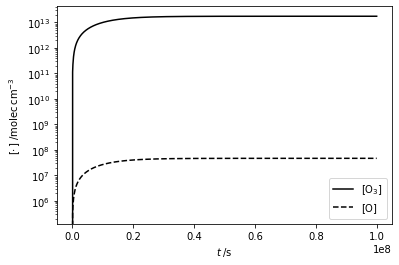

In [20]:
plt.plot(t,c[:,2], c='k', label=r'$\mathrm{[O_3]}$')
plt.plot(t,c[:,1], c='k', ls='--', label=r'$\mathrm{[O]}$')
plt.yscale('log')
plt.xlabel(r'$t\;/\mathrm{s}$')
plt.ylabel(r'$[\cdot\,]\;/\mathrm{molec\,cm^{-3}}$')
plt.legend()
plt.show()